In [14]:
import numpy as np               # the numerical library of python
import matplotlib.pyplot as plt
import matplotlib.ticker as ax
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, LogLocator
from matplotlib import rc
rc('font',**{'family':'serif'})  # fontype matching Latex
from scipy.stats import linregress as lin


# this makes the plots to appear in the notebook and not in an external window
%matplotlib inline 

import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

In [4]:
files = np.load('./neb/FSPS_SEDWithNeb_Salpeter_Age3Myr_logZ-0.1_logU-1.0_per_Msun.npz','r')

In [5]:
files.files
wv = files['wvl_emline_aa']
lum = files['lum_emline_lsun']
print np.where(wv == 3727.1)[0], ' OII 3727'
print np.where(wv == 5008.24)[0], ' OIII 5008'
print np.where(wv == 1215.67)[0], ' HI 1216'
print np.where(wv == 6564.6)[0], ' HI 6565'
print np.where(wv == 1640.42)[0], ' HeII 1640'
print np.where(wv == 4862.71)[0], ' HI 4862'
#for x in xrange(len(wv)):
#    print wv[x], lum[x]

[31]  OII 3727
[50]  OIII 5008
[7]  HI 1216
[62]  HI 6565
[8]  HeII 1640
[48]  HI 4862


In [6]:
zlist = np.linspace(-3.,1.,41)
ulist = np.linspace(-4.,-1.,4)
oii = np.zeros((41,4))
oiii =np.zeros((41,4))
lya = np.zeros((41,4))
ha =np.zeros((41,4))
he = np.zeros((41,4))
hb = np.zeros((41,4))



In [7]:
for z,zi in enumerate(zlist):
    for u,ui in enumerate(ulist):
        files = np.load('./neb/bursty/FSPS_SEDWithNeb_Salpeter_Age3Myr_logZ%.1f_logU%.1f_per_Msun.npz'%(zi,ui),'r')
        lum = files['lum_emline_lsun']
        #print lum[31]
        #asd
        #print oii[z,u]
        oii[z,u] = lum[31]
        lya[z,u] = lum[7]
        ha[z,u] = lum[62]
        oiii[z,u] = lum[50]
        he[z,u] = lum[8]
        hb[z,u] = lum[48]
        

Text(0,0.5,' L_Hb [L_sun/M_sun]')

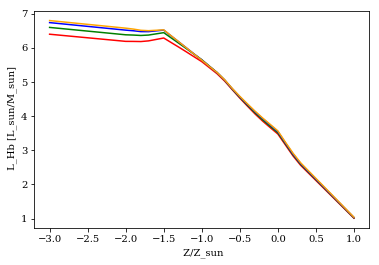

In [23]:
plt.plot(zlist,hb[:,0],'r')
plt.plot(zlist,hb[:,1],'g')
plt.plot(zlist,hb[:,2],'b')
plt.plot(zlist,hb[:,3],'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_Hb [L_sun/M_sun]')

Text(0,0.5,' L_HeII [L_sun/M_sun]')

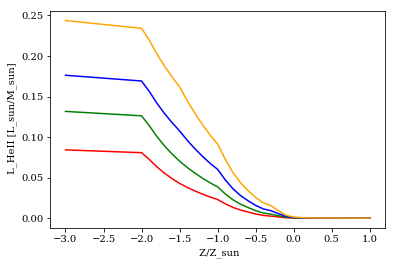

In [6]:
plt.plot(zlist,he[:,0],'r')
plt.plot(zlist,he[:,1],'g')
plt.plot(zlist,he[:,2],'b')
plt.plot(zlist,he[:,3],'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_HeII [L_sun/M_sun]')

Text(0,0.5,' L_OIII [L_sun/M_sun]')

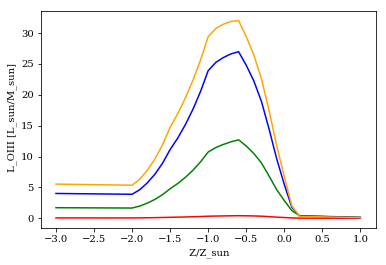

In [7]:
plt.plot(zlist,oiii[:,0],'r')
plt.plot(zlist,oiii[:,1],'g')
plt.plot(zlist,oiii[:,2],'b')
plt.plot(zlist,oiii[:,3],'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_OIII [L_sun/M_sun]')

Text(0,0.5,' L_OII [L_sun/M_sun]')

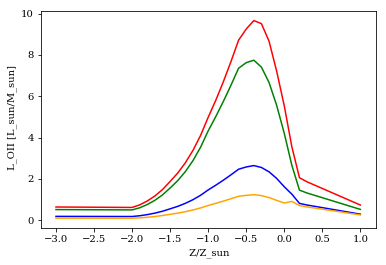

In [8]:
plt.plot(zlist,oii[:,0],'r')
plt.plot(zlist,oii[:,1],'g')
plt.plot(zlist,oii[:,2],'b')
plt.plot(zlist,oii[:,3],'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_OII [L_sun/M_sun]')

Text(0,0.5,' L_Ha [L_sun/M_sun]')

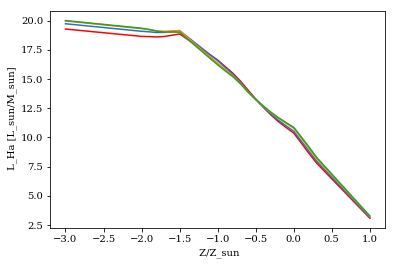

In [24]:
plt.plot(zlist,ha[:,0],'r')
plt.plot(zlist,ha[:,1])
plt.plot(zlist,ha[:,2])
plt.plot(zlist,ha[:,3])

plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_Ha [L_sun/M_sun]')

Text(0,0.5,' L_Lya [L_sun/M_sun]')

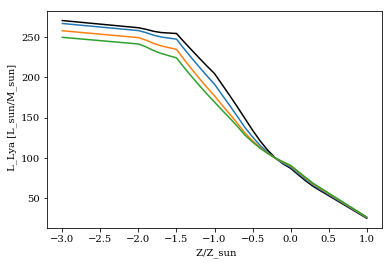

In [10]:
plt.plot(zlist,lya[:,0],'k')
plt.plot(zlist,lya[:,1])
plt.plot(zlist,lya[:,2])
plt.plot(zlist,lya[:,3])

plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_Lya [L_sun/M_sun]')

In [11]:
print str(lya[15,:])

[254.36137223 247.39252244 234.66714142 224.16303629]


# continuous case

In [28]:
zlist = np.linspace(-3.,1.,41)
ulist = np.linspace(-4.,-1.,4)
oii = np.zeros((41,4))
oiii =np.zeros((41,4))
lya = np.zeros((41,4))
ha =np.zeros((41,4))
he =np.zeros((41,4))

In [29]:
for z,zi in enumerate(zlist):
    for u,ui in enumerate(ulist):
        files = np.load('./neb/cont/FSPS_SED_Salpeter_Age100Myr_logZ%.1f_logU%.1f_per_Msun.npz'%(zi,ui),'r')
        lum = files['lum_emline_lsun']
        #print lum[31]
        #asd
        oii[z,u] = lum[31]
        lya[z,u] = lum[7]
        ha[z,u] = lum[62]
        oiii[z,u] = lum[50]
        he[z,u] = lum[8]

Text(0,0.5,' L_HeII [L_sun/M_sun]')

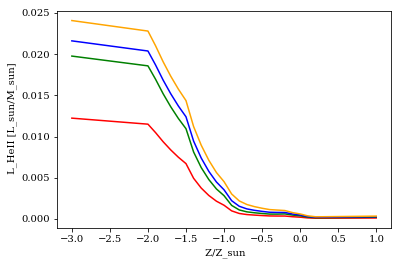

In [30]:
plt.plot(zlist,he[:,0]/1e8,'r')
plt.plot(zlist,he[:,1]/1e8,'g')
plt.plot(zlist,he[:,2]/1e8,'b')
plt.plot(zlist,he[:,3]/1e8,'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_HeII [L_sun/M_sun]')

Text(0,0.5,' L_OIII [L_sun/M_sun]')

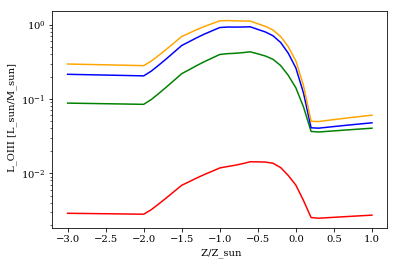

In [31]:
plt.semilogy(zlist,oiii[:,0]/1e8,'r')
plt.semilogy(zlist,oiii[:,1]/1e8,'g')
plt.semilogy(zlist,oiii[:,2]/1e8,'b')
plt.semilogy(zlist,oiii[:,3]/1e8,'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_OIII [L_sun/M_sun]')

Text(0,0.5,' L_OII [L_sun/M_sun]')

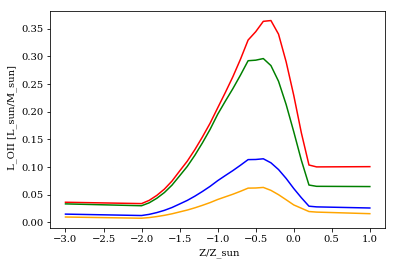

In [16]:
plt.plot(zlist,oii[:,0]/1e8,'r')
plt.plot(zlist,oii[:,1]/1e8,'g')
plt.plot(zlist,oii[:,2]/1e8,'b')
plt.plot(zlist,oii[:,3]/1e8,'orange')
plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_OII [L_sun/M_sun]')

Text(0,0.5,' L_Ha [L_sun/M_sun]')

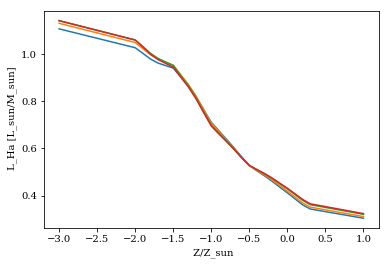

In [17]:
plt.plot(zlist,ha[:,0]/1e8)
plt.plot(zlist,ha[:,1]/1e8)
plt.plot(zlist,ha[:,2]/1e8)
plt.plot(zlist,ha[:,3]/1e8)

plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_Ha [L_sun/M_sun]')

Text(0,0.5,' L_Lya [L_sun/M_sun]')

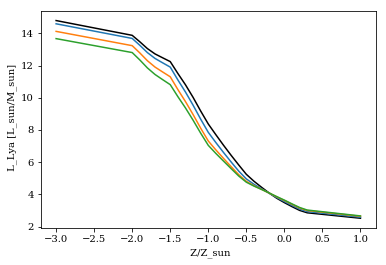

In [18]:
plt.plot(zlist,lya[:,0]/1e8,'k')
plt.plot(zlist,lya[:,1]/1e8)
plt.plot(zlist,lya[:,2]/1e8)
plt.plot(zlist,lya[:,3]/1e8)

plt.xlabel(' Z/Z_sun')
plt.ylabel(' L_Lya [L_sun/M_sun]')

## BPASS Lines

In [8]:
metalrange = np.log10(np.array([1.e-5, 1.e-4, 0.001, 0.002, 0.003, 0.004,0.006, 0.008, 0.01, 0.014, 0.02, 0.04])/0.014)
urange = np.array([-4.,-3.5,-3.,-2.5,-2.,-1.5,-1.])


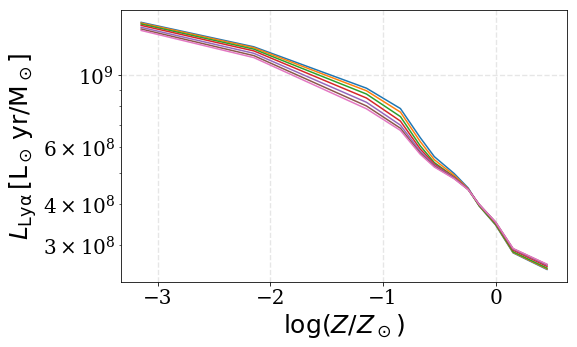

In [29]:
plt.figure(figsize=(8,5))
u,d,t,q,c,s,st = np.loadtxt('./limfast-master/limfast_bt/External_tables/line_tables_bpass/LlineTbl_POP2_HI1216A_Continuous_ND.dat',unpack=True,skiprows=0)
plt.semilogy(metalrange, u,label=r'$\log\, U = -4$')
plt.semilogy(metalrange, d,label=r'$\log\, U = -3.5$')
plt.semilogy(metalrange, t,label=r'$\log \,U = -3$')
plt.semilogy(metalrange, q,label=r'$\log \,U = -2.5$')
plt.semilogy(metalrange, c,label=r'$\log \,U = -2$')
plt.semilogy(metalrange, s,label=r'$\log \,U = -1.5$')
plt.semilogy(metalrange, st,label=r'$\log \,U = -1$')

plt.xlabel(' log (Z/Z_sun)')
plt.ylabel(r'$L_{\rm Ly\alpha}\, {\rm [L_\odot\,yr/M_\odot]}$',fontsize=25)




plt.xlabel(r'$ \log (Z/Z_\odot)$',fontsize=25)
#plt.legend(loc='best',frameon=False,prop={'size': 17})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

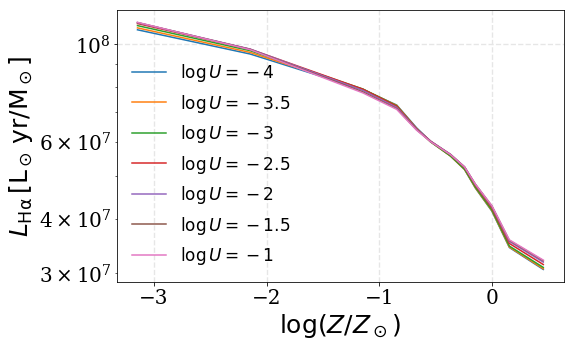

In [28]:
plt.figure(figsize=(8,5))
u,d,t,q,c,s,st = np.loadtxt('./limfast-master/limfast_bt/External_tables/line_tables_bpass/LlineTbl_POP2_HI6563A_Continuous_ND.dat',unpack=True,skiprows=0)
plt.semilogy(metalrange, u,label=r'$\log\, U = -4$')
plt.semilogy(metalrange, d,label=r'$\log\, U = -3.5$')
plt.semilogy(metalrange, t,label=r'$\log \,U = -3$')
plt.semilogy(metalrange, q,label=r'$\log \,U = -2.5$')
plt.semilogy(metalrange, c,label=r'$\log \,U = -2$')
plt.semilogy(metalrange, s,label=r'$\log \,U = -1.5$')
plt.semilogy(metalrange, st,label=r'$\log \,U = -1$')

plt.xlabel(' log (Z/Z_sun)')
plt.ylabel(r'$L_{\rm H\alpha}\, {\rm [L_\odot\,yr/M_\odot]}$',fontsize=25)





plt.xlabel(r'$ \log (Z/Z_\odot)$',fontsize=25)
plt.legend(loc='best',frameon=False,prop={'size': 17})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

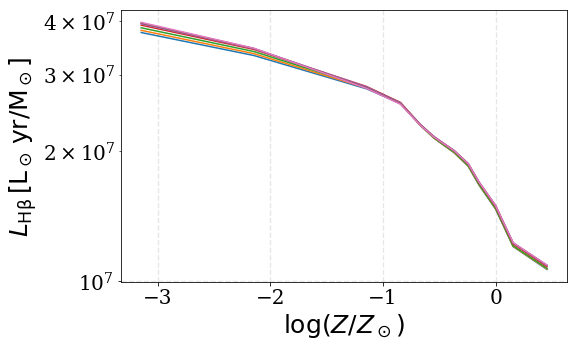

In [20]:
plt.figure(figsize=(8,5))
u,d,t,q,c,s,st = np.loadtxt('./limfast-master/limfast_bt/External_tables/line_tables_bpass/LlineTbl_POP2_HI4861A_Continuous_ND.dat',unpack=True,skiprows=0)
plt.semilogy(metalrange, u)
plt.semilogy(metalrange, d)
plt.semilogy(metalrange, t)
plt.semilogy(metalrange, q)
plt.semilogy(metalrange, c)
plt.semilogy(metalrange, s)
plt.semilogy(metalrange, st)

plt.xlabel(' log (Z/Z_sun)')
plt.ylabel(r'$L_{\rm H\beta}\, {\rm [L_\odot\,yr/M_\odot]}$',fontsize=25)




plt.xlabel(r'$ \log (Z/Z_\odot)$',fontsize=25)
plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

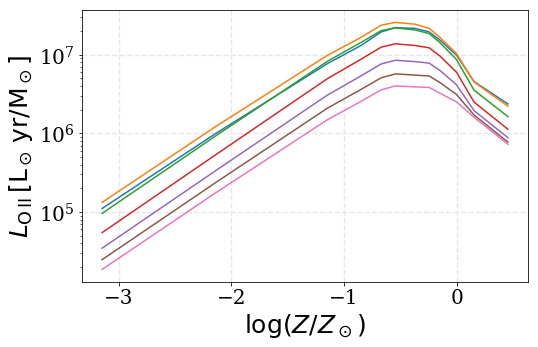

In [19]:
plt.figure(figsize=(8,5))
u,d,t,q,c,s,st = np.loadtxt('./limfast-master/limfast_bt/External_tables/line_tables_bpass/LlineTbl_POP2_OII3726A_Continuous_ND.dat',unpack=True,skiprows=0)
plt.semilogy(metalrange, u)
plt.semilogy(metalrange, d)
plt.semilogy(metalrange, t)
plt.semilogy(metalrange, q)
plt.semilogy(metalrange, c)
plt.semilogy(metalrange, s)
plt.semilogy(metalrange, st)

plt.xlabel(' log (Z/Z_sun)')
plt.ylabel(r'$L_{\rm O\,II}\, {\rm [L_\odot\,yr/M_\odot]}$',fontsize=25)






plt.xlabel(r'$ \log (Z/Z_\odot)$',fontsize=25)
plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

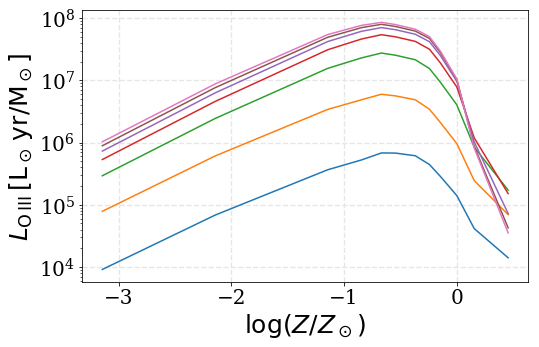

In [18]:
plt.figure(figsize=(8,5))


u,d,t,q,c,s,st = np.loadtxt('./limfast-master/limfast_bt/External_tables/line_tables_bpass/LlineTbl_POP2_OIII5007A_Continuous_ND.dat',unpack=True,skiprows=0)
plt.semilogy(metalrange, u)
plt.semilogy(metalrange, d)
plt.semilogy(metalrange, t)
plt.semilogy(metalrange, q)
plt.semilogy(metalrange, c)
plt.semilogy(metalrange, s)
plt.semilogy(metalrange, st)

plt.ylabel(r'$L_{\rm O\,III}\, {\rm [L_\odot\,yr/M_\odot]}$',fontsize=25)





plt.xlabel(r'$ \log (Z/Z_\odot)$',fontsize=25)
plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)